# Business Case Assessment
For The Resource Group Case Assessment

Abigail Stokes, November 1, 2023


In [253]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shutup;shutup.please()

#Reading in the Data
prod_info = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Product Information')
item_cost = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Item Costs')
discount = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Supplier Discounts')
market_research = pd.read_excel("/Users/abbystokes/Documents/GitHub/TRGCaseAssessment/AssessmentData.xlsx",'Market Research')

In [254]:
#Visual Inspection of data 
print("Product Information")
prod_info

Product Information


,Manufacturer,Product Number
0,"Inc, Supplier A",MAG34343
1,Supplier A Inc.,MAG34367
2,Supplier A INC,MAG34389
3,Supplier B Corporation,ESE345
4,Supplier B Corp.,ESE346
5,Supplier B CORP,ESE347
6,Supplier C Co,N211121
7,Supplier C Co.,N211450
8,Supplier C Company,N211789
9,Supplier D,CAPSUR034


### Question 1: Standardize the supplier names from the Manufacturer column of the Product Information table. Store the cleaned names in a column called Manufacturer Clean.

In [255]:
# Adding a new column to Product Information with clean Manufacturer names

prod_info['Manufacturer Clean'] = prod_info.Manufacturer.str.extract(r'(supplier\s[A-E])', flags=re.IGNORECASE)
prod_info

,Manufacturer,Product Number,Manufacturer Clean
0,"Inc, Supplier A",MAG34343,Supplier A
1,Supplier A Inc.,MAG34367,Supplier A
2,Supplier A INC,MAG34389,Supplier A
3,Supplier B Corporation,ESE345,Supplier B
4,Supplier B Corp.,ESE346,Supplier B
5,Supplier B CORP,ESE347,Supplier B
6,Supplier C Co,N211121,Supplier C
7,Supplier C Co.,N211450,Supplier C
8,Supplier C Company,N211789,Supplier C
9,Supplier D,CAPSUR034,Supplier D


In [256]:
# Looking at Item Cost table
print("Item Cost")
item_cost

Item Cost


,Product Number,Item Description,Item Cost
0,ESE346,ELECTRODES PACING ESSENTIO,20
1,MAG34367,PACER CARDIAC MAGNF PULSE GENTR,800
2,N211121,LEADS PACING NOVS,15
3,MER6793,ELECTRODES PACING MERRIl,25
4,ESE345,LEADS PACING ESSENTIO,30
5,CAPSUR110,PACER CARDIAC AZURE PULSE GENTR,960
6,MER1232,LEADS PACING MERRIL,125
7,ESE347,PACER CARDIAC ESSENTIO PULS GENTR,900
8,CAPSUR045,ELECTRODES PACING CAPSUR,10
9,N211450,ELECTRODES PACING NOVS,10


In [257]:
# Joining the Product Info and Item Cost table on Product Number
merged_df = prod_info.merge(item_cost, how = 'left', on = ['Product Number'])

# Dropping original manufacturer column
merged_df.drop(columns = ['Manufacturer'])
merged_df

,Manufacturer,Product Number,Manufacturer Clean,Item Description,Item Cost
0,"Inc, Supplier A",MAG34343,Supplier A,LEADS PACING MAGNF,75
1,Supplier A Inc.,MAG34367,Supplier A,PACER CARDIAC MAGNF PULSE GENTR,800
2,Supplier A INC,MAG34389,Supplier A,ELECTRODES PACING MAGNF,25
3,Supplier B Corporation,ESE345,Supplier B,LEADS PACING ESSENTIO,30
4,Supplier B Corp.,ESE346,Supplier B,ELECTRODES PACING ESSENTIO,20
5,Supplier B CORP,ESE347,Supplier B,PACER CARDIAC ESSENTIO PULS GENTR,900
6,Supplier C Co,N211121,Supplier C,LEADS PACING NOVS,15
7,Supplier C Co.,N211450,Supplier C,ELECTRODES PACING NOVS,10
8,Supplier C Company,N211789,Supplier C,PACER CARDIAC NOVS PULSE GENTR,950
9,Supplier D,CAPSUR034,Supplier D,LEADS PACING CAPSUR,10


Observations: 
1. We see that each Supplier provides three different types of items: leads pacing, a pulse generator, and electrodes pacing.
2. The first three (or more) characters of the product number is consistent within each supplier.

### Question 2: Use the dataset to calculate the cost of a pacemaker system for each supplier (excluding any discounts).

  Manufacturer Clean  Item Cost
0         Supplier A        900
1         Supplier B        950
2         Supplier C        975
3         Supplier D        980
4         Supplier E        850


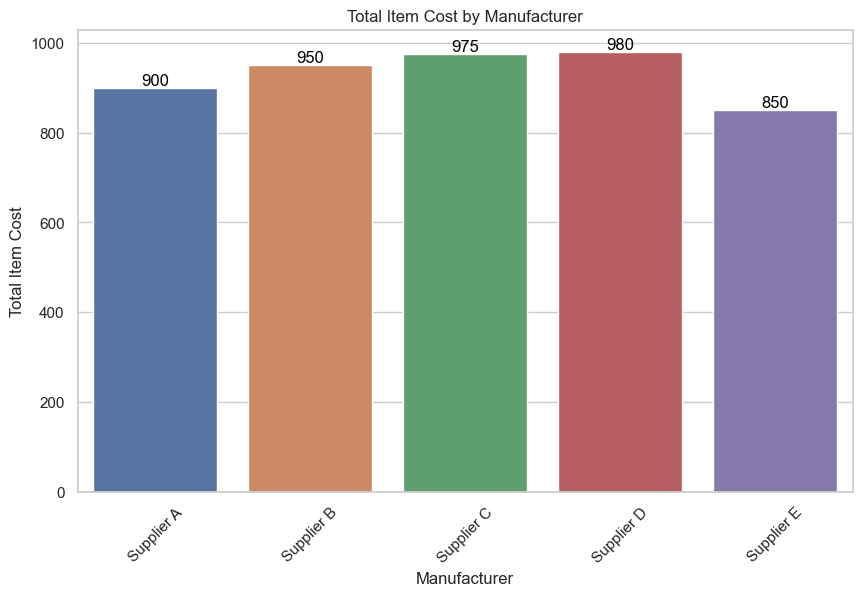

In [258]:
# Sum item costs by manufacturer
grouped = merged_df.groupby('Manufacturer Clean')['Item Cost'].sum().reset_index()

# Plot the data
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='Manufacturer Clean', y='Item Cost', data=grouped)
plt.xlabel('Manufacturer')
plt.ylabel('Total Item Cost')
plt.title('Total Item Cost by Manufacturer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add bar labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


print(grouped)
plt.show()


It looks like Supplier E is the cheapest based on overall cost, and suppliers C and D are the most expensive. Now let's take a look at how cost breaks down by part

In [259]:
# Adding new column with extracted Item Type 
pattern = r"(LEADS\sPACING|PACER\sCARDIAC|ELECTRODES\sPACING)" #pattern to find item name
merged_df['Item Type'] = merged_df['Item Description'].str.extract(pattern, flags=re.IGNORECASE)


merged_df

,Manufacturer,Product Number,Manufacturer Clean,Item Description,Item Cost,Item Type
0,"Inc, Supplier A",MAG34343,Supplier A,LEADS PACING MAGNF,75,LEADS PACING
1,Supplier A Inc.,MAG34367,Supplier A,PACER CARDIAC MAGNF PULSE GENTR,800,PACER CARDIAC
2,Supplier A INC,MAG34389,Supplier A,ELECTRODES PACING MAGNF,25,ELECTRODES PACING
3,Supplier B Corporation,ESE345,Supplier B,LEADS PACING ESSENTIO,30,LEADS PACING
4,Supplier B Corp.,ESE346,Supplier B,ELECTRODES PACING ESSENTIO,20,ELECTRODES PACING
5,Supplier B CORP,ESE347,Supplier B,PACER CARDIAC ESSENTIO PULS GENTR,900,PACER CARDIAC
6,Supplier C Co,N211121,Supplier C,LEADS PACING NOVS,15,LEADS PACING
7,Supplier C Co.,N211450,Supplier C,ELECTRODES PACING NOVS,10,ELECTRODES PACING
8,Supplier C Company,N211789,Supplier C,PACER CARDIAC NOVS PULSE GENTR,950,PACER CARDIAC
9,Supplier D,CAPSUR034,Supplier D,LEADS PACING CAPSUR,10,LEADS PACING


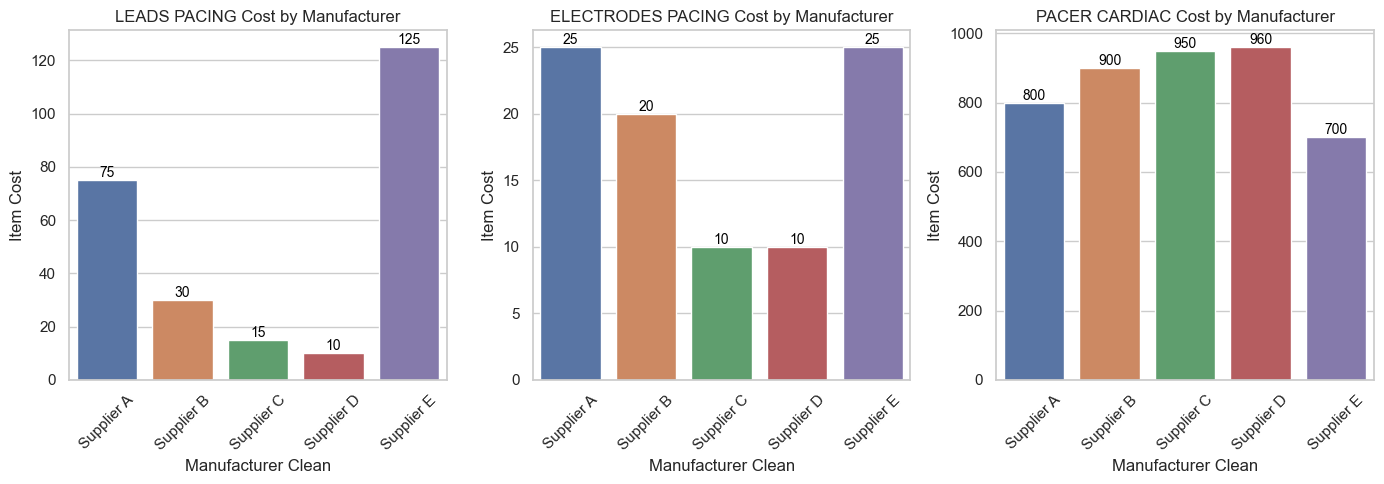

In [260]:
# Plot item cost by supplier, broken down by item type
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Create a list of item types
item_types = ['LEADS PACING', 'ELECTRODES PACING', 'PACER CARDIAC']

for i, item_type in enumerate(item_types):
    ax = sns.barplot(x='Manufacturer Clean', y='Item Cost', data=merged_df[merged_df['Item Type'] == item_type], ax=axes[i])
    axes[i].set_title(f'{item_type} Cost by Manufacturer')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for each subplot
    
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Interesting observation here: we see that while Supplier E was the cheapest overall, their leads pacing product is much more expensive than the other suppliers.

### Question 3: If there were 50 cases, what is total cost of a pacemaker system for each supplier before discounts and after discounts?

In [261]:
#Look at discounts table
print("Supplier Discounts")
discount

Supplier Discounts


,Manufacturer,Discount
0,Supplier A,0.10
1,Supplier E,0.10
2,Supplier D,0.15
3,Supplier B,0.20
4,Supplier C,0.20


In [262]:
# Add new column to Discounts table with total cost before and after discount
merged_df = merged_df.rename(columns={'Manufacturer Clean' : 'Manufactuer'})
#discount = discount.merge(item_cost, how = 'left', on = ['Manufacturer'])

In [263]:
print("Market Research")

market_research

new_header = market_research.iloc[0] #grab the first row for the header
market_research = market_research[1:] #take the data less the header row
market_research.columns = new_header
market_research

Market Research


,Supplier,Shipping Times,Labor Shortages,Backorder Issues,Doctor's Opinion of Product,Supplier Sales Representative Relationship,Frequency of Quality Issues
1,Supplier A,Long \n(2+ weeks),Infrequently Impacted,Occassionally,Neutral,Dislike,Never
2,Supplier B,Average \n(1 week),Very Frequently Impacted,Often,Positive,Friendly,Hardly Ever
3,Supplier C,Short \n(2-3 days),Infrequently Impacted,Often,Neutral,Neutral,Occassionally
4,Supplier D,Short \n(2-3 days),Very Frequently Impacted,Occassionally,Positive,Neutral,Occassionally
5,Supplier E,Long \n(2+ weeks),Sometimes Impacted,Hardly Ever,Negative,Friendly,Hardly Ever
